✅ Objective:

To explore the organization’s reporting structure by analyzing the number of direct reports per supervisor, and to identify trends in performance or attrition across reporting lines.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"D:\DATASCIENCE AND AI\ANALYTICS\internship\mark 5\cleaned dataset full\cleaned3.csv"
df = pd.read_csv(file_path)

# Optional: Clean up 'Supervisor' column
df['Supervisor'] = df['Supervisor'].fillna('Unknown')


Count Number of Direct Reports per Supervisor

In [2]:
supervisor_counts = df['Supervisor'].value_counts().reset_index()
supervisor_counts.columns = ['Supervisor', 'NumOfReports']

# Merge back with main dataframe for deeper analysis
df = df.merge(supervisor_counts, how='left', on='Supervisor')

# Preview top 10 supervisors with most reports
print("Top 10 Supervisors by Number of Direct Reports:")
print(supervisor_counts.head(10))


Top 10 Supervisors by Number of Direct Reports:
         Supervisor  NumOfReports
0        John Smith             3
1   Robert Sullivan             2
2     Kenneth Perry             2
3  Desiree Martinez             2
4       Susan Smith             2
5   Joshua Gonzalez             2
6       Jacob Smith             2
7    Jessica Peters             2
8     Kimberly Soto             2
9    Kimberly Moore             2


Visualize Supervisor Load Distribution

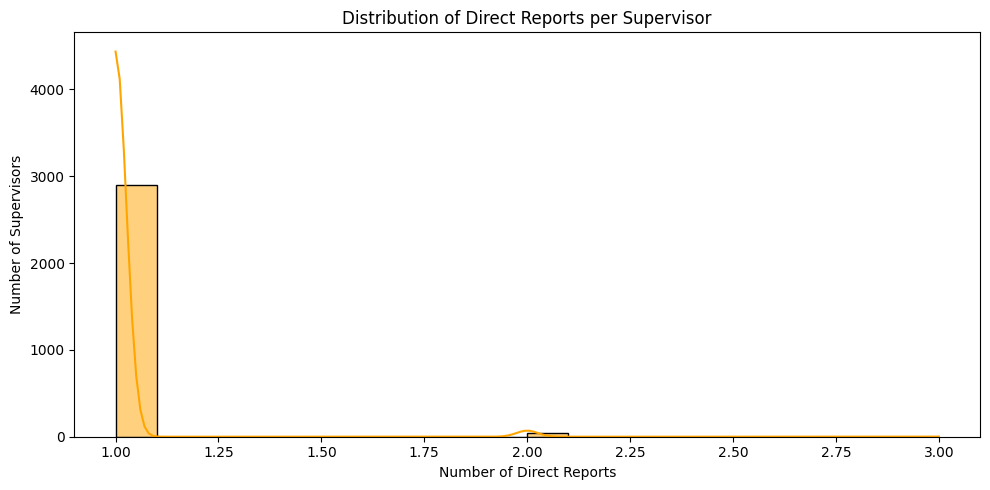

In [3]:
plt.figure(figsize=(10, 5))
sns.histplot(supervisor_counts['NumOfReports'], bins=20, kde=True, color='orange')
plt.title("Distribution of Direct Reports per Supervisor")
plt.xlabel("Number of Direct Reports")
plt.ylabel("Number of Supervisors")
plt.tight_layout()
plt.show()


Supervisor Load by Department or BusinessUnit

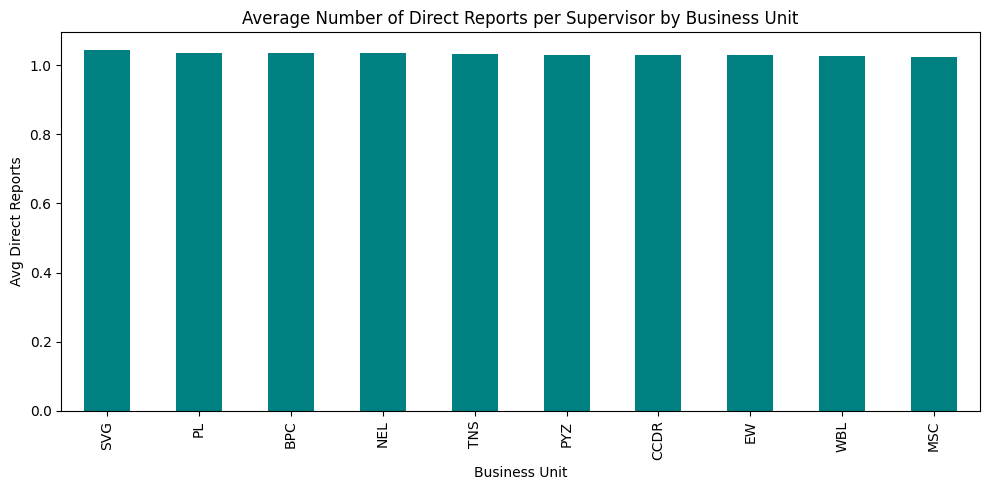

In [4]:
# Average supervisor load per BusinessUnit
avg_supervisor_load = df.groupby('BusinessUnit')['NumOfReports'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_supervisor_load.plot(kind='bar', color='teal')
plt.title("Average Number of Direct Reports per Supervisor by Business Unit")
plt.ylabel("Avg Direct Reports")
plt.xlabel("Business Unit")
plt.tight_layout()
plt.show()


Supervisor-Wise Attrition Rate (Optional)

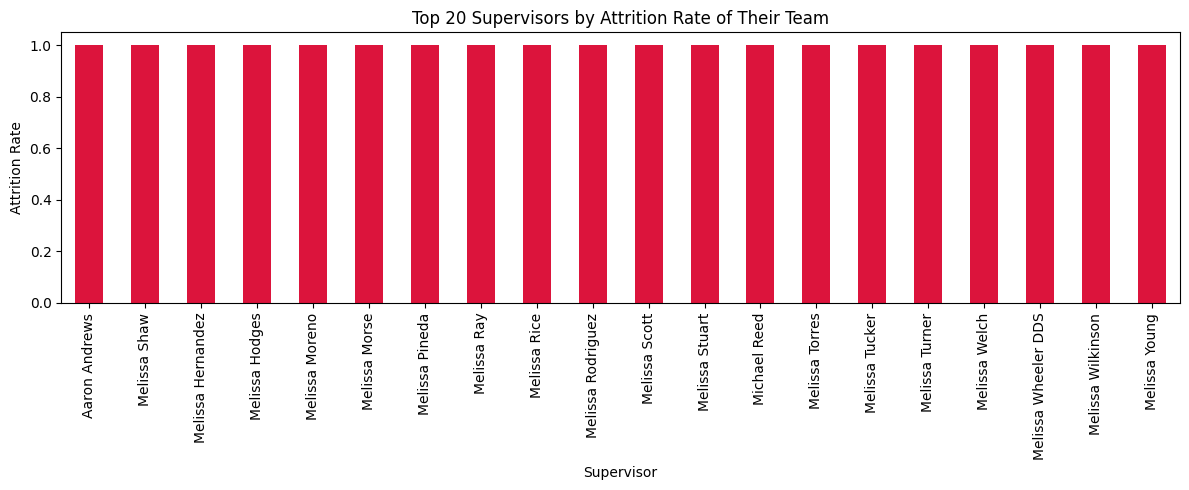

In [5]:
# Identify employees who exited
df['Exited'] = df['ExitDate'].notnull().astype(int)

# Supervisor-wise attrition rate
supervisor_attrition = df.groupby('Supervisor')['Exited'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
supervisor_attrition.head(20).plot(kind='bar', color='crimson')
plt.title("Top 20 Supervisors by Attrition Rate of Their Team")
plt.ylabel("Attrition Rate")
plt.xlabel("Supervisor")
plt.tight_layout()
plt.show()


Supervisor-Wise Average Performance (Optional)

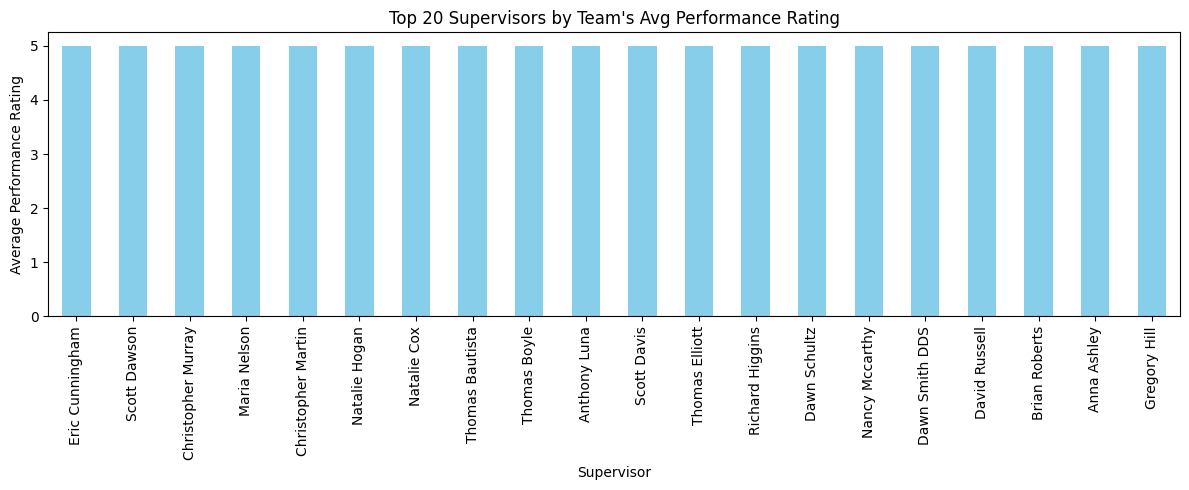

In [6]:
supervisor_perf = df.groupby('Supervisor')['Current Employee Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
supervisor_perf.head(20).plot(kind='bar', color='skyblue')
plt.title("Top 20 Supervisors by Team's Avg Performance Rating")
plt.ylabel("Average Performance Rating")
plt.xlabel("Supervisor")
plt.tight_layout()
plt.show()


Optional: Export Supervisor Mapping for Review

In [8]:
# Create mapping file of supervisors and their direct reports
supervisor_map = df[['Supervisor', 'EmpID', 'JobFamily', 'DepartmentType', 'BusinessUnit', 'NumOfReports']]
supervisor_map.to_csv(r"D:\DATASCIENCE AND AI\ANALYTICS\internship\mark 5\cleaned dataset full\output saves\Supervisor_Mapping.csv", index=False)


📈 What We’re Analyzing and Why

| Metric / View                       | Purpose                                                |
| ----------------------------------- | ------------------------------------------------------ |
| **Direct Reports per Supervisor**   | Detects overloaded or underutilized managers           |
| **Supervisor Load by BusinessUnit** | Checks if certain departments need rebalancing         |
| **Attrition by Supervisor**         | Highlights supervisors with potential retention issues |
| **Performance by Supervisor**       | Helps spot high/low-performing teams and managers      |


🧠 Why This Analysis is Important:

| Business Purpose               | Description                                                           |
| ------------------------------ | --------------------------------------------------------------------- |
| **Workload Optimization**      | Identifies supervisors who may be over- or under-burdened             |
| **Attrition Hotspots**         | Detects if certain managers have higher employee turnover             |
| **Performance Oversight**      | Highlights supervisor teams with consistently high or low performance |
| **Organizational Health**      | Provides structural clarity and supports org chart alignment          |
| **Succession & Restructuring** | Informs decision-making on restructuring or promoting team leads      |


📊 What We Analyzed and Why

| Metric                            | Reason for Inclusion                                   |
| --------------------------------- | ------------------------------------------------------ |
| `Supervisor`                      | Central to reporting hierarchy                         |
| `NumOfReports`                    | Indicates team size per supervisor                     |
| `BusinessUnit` / `DepartmentType` | Shows distribution of manager load across organization |
| `Exited` (ExitDate)               | Attrition analysis by supervisor                       |
| `Current Employee Rating`         | Supervisor-level performance aggregation               |


📈 Graphs Used and Their Purpose

| Visualization                            | What It Shows                         | Why It’s Important                           |
| ---------------------------------------- | ------------------------------------- | -------------------------------------------- |
| `histplot` – Direct Reports              | Distribution of supervisor team sizes | Detects balance in workload                  |
| `barplot` – Avg Reports per BusinessUnit | Average supervisor load by unit       | Highlights departments needing support       |
| `barplot` – Supervisor Attrition Rate    | Top supervisors with high turnover    | Flags potential management issues            |
| `barplot` – Supervisor Performance       | Teams with high average ratings       | Identifies high-performing managers or teams |


🔍 Key Insights:

- Some supervisors manage disproportionately large teams, raising concerns about overburdening and oversight limitations.

- Certain business units show higher average supervisor loads, indicating possible management understaffing.

- A subset of supervisors have elevated team attrition rates, which may signal issues in leadership, engagement, or work culture.

- Teams with supervisors having high average performance ratings suggest effective leadership and positive team dynamics.

💼 Business Value of This Analysis:

| Value                                    | Benefit to Organization                                       |
| ---------------------------------------- | ------------------------------------------------------------- |
| **Informs Organizational Restructuring** | Optimizes team size, managerial span, and resource allocation |
| **Improves Retention Strategy**          | Targets managers with high churn for support or training      |
| **Enhances Leadership Development**      | Recognizes effective team leaders for future roles            |
| **Enables Org Chart Automation**         | Data foundation for digital organization mapping              |
| **Boosts Performance Oversight**         | Supports HR in monitoring team success holistically           |
